**Name: Christ-Brian Amedjonekou**  
**Date: 2/04/2019**  
**MAT 4880-D692 (Math Modeling II) Deer Problem HW 1**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

# Section 4.1 - Steady State Analysis

# Whale Problem

**Variables**

* $P = \text{number of Dear}$  
* $g_P = \text{growth rate of the Deer Population}$  
* $a_P = \text{self limiting factor of the Deer Population}$  

**Assumptions**

* $g_P = 0.75P$
* $a_P = \frac{0.75P^2}{500}, \text{ where } K = 500$
* $P\geq 0$

### Modules

In [1]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import pandas as pd

### Variables

In [2]:
# Writing the Model for the deer population
P = sp.symbols('P')
#dPdt = sp.Function('dPdt')

# init_session() displays LaTeX version of outputs; 'quiet= True' stops 
# init_session from printing messages regarding its status
sp.init_printing()

### Sympy Rendition

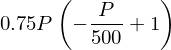

In [3]:
# Output
dPdt = (0.75 * P)*(1 - P/500)
dPdt

### Equillibrium Points

***(a) The equillibrium points to the Deer Population are shown below. They occur when $\frac{dP}{dt} = 0$***

In [4]:
# Solution to the model(Equillibrium Point)

equillibrium_points = solve([dPdt], P)
print('Equillibrium Points: {} and {}'.format(equillibrium_points[0], equillibrium_points[1]))

Equillibrium Points: (0.0,) and (500.000000000000,)


### Functions

In [5]:
def dP_dt(deer):
    """Calculates the rate of change of deer Population"""
    dPxdt = (0.75 * deer)*(1 - deer/500)
    return dPxdt

def dPdt_table(start, finish):
    """Creates table for the above deer population. 
    Takes start and finish variables."""
    dictionary = {'P':np.arange(start,finish), 'dPdt': dP_dt(np.arange(start,finish))}
    df = pd.DataFrame.from_dict(dictionary)
    return df

***(b,1) The sign of $\frac{dP}{dt}$ if $P < 0$, is shown below; The sign is negative for all values. It should also be neglected as we cannot have negative Deer.***

In [6]:
dPdt_table(-9,0)

,P,dPdt
0,-9,-6.8715
1,-8,-6.0960
2,-7,-5.3235
3,-6,-4.5540
4,-5,-3.7875
5,-4,-3.0240
6,-3,-2.2635
7,-2,-1.5060
8,-1,-0.7515


***(b,2) The sign of $\frac{dP}{dt}$ if $0< P < 500$, is shown below; The sign is positive for all values. You'll notice the equillibrian points at 0 and 500. The rate of change (growth) of the Deer Population equals 0 when there are no deer and when the deer reaches its carrying capacity.***

In [7]:
dPdt_table(0,501).head(7)

,P,dPdt
0,0,0.0000
1,1,0.7485
2,2,1.4940
3,3,2.2365
4,4,2.9760
5,5,3.7125
6,6,4.4460


In [8]:
dPdt_table(0,501).tail(7)

,P,dPdt
494,494,4.4460
495,495,3.7125
496,496,2.9760
497,497,2.2365
498,498,1.4940
499,499,0.7485
500,500,0.0000


***(b,3) The sign of $\frac{dP}{dt}$ if $P > 500$, is shown below; The sign is negative for all values. Again the Deer Population cannot be negative therefore this value can be neglected***

In [9]:
dPdt_table(501,1000).head(7)

,P,dPdt
0,501,-0.7515
1,502,-1.5060
2,503,-2.2635
3,504,-3.0240
4,505,-3.7875
5,506,-4.5540
6,507,-5.3235


In [10]:
dPdt_table(501,1000).tail(7)

,P,dPdt
492,993,-734.3235
493,994,-736.5540
494,995,-738.7875
495,996,-741.0240
496,997,-743.2635
497,998,-745.5060
498,999,-747.7515


### Plotting Vector Field

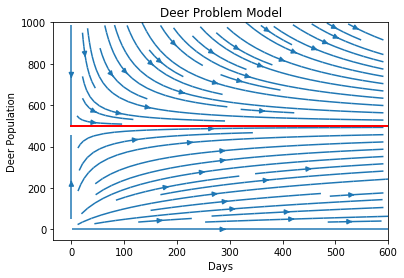

In [11]:
%matplotlib inline
#----------------------------------------------------------------------------------
# Creates the superimposed plot for stream plot of the model, as well as dPdt = 0
#----------------------------------------------------------------------------------

# Part 1: Creates the length of the 'X' (Days) and 'Y'(Deer Population) Axis 
x, y = np.linspace(0, 600), np.linspace(0, 1000)
X, Y = np.meshgrid(x, y)

# Part 2: The approximated points of the function dP/dt which we'll use for the plot.
U, V = X, dP_dt(Y)

# Part 3: Creating the figure for the plot
fig, ax1 = plt.subplots()

# Part 4: Creating the plots for dP/dt = 0, the Nullclines

ax1.plot([0,600],[500,500], 'r-', lw=2, label='Deer-Nullcline')

# Part 5: Sets the axis, and equillibrium information for the plot
plt.title('Deer Problem Model')
ax1.set_xlabel('Days')
ax1.set_ylabel('Deer Population')
ax1.tick_params(axis='Deer Population', labelcolor='k')

# Part 6: Plots the streamplot which represents the vector plot.
ax1.streamplot(X, Y, U, V)